In [243]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import sys

# Constantes

In [244]:
black = (0, 0, 0)

In [245]:
def rounded_rectangle(self, xy, corner_radius, fill=None, outline=None):
    upper_left_point = xy[0]
    bottom_right_point = xy[1]
    self.rectangle(
        [
            (upper_left_point[0], upper_left_point[1] + corner_radius),
            (bottom_right_point[0], bottom_right_point[1] - corner_radius)
        ],
        fill=fill,
        outline=outline
    )
    self.rectangle(
        [
            (upper_left_point[0] + corner_radius, upper_left_point[1]),
            (bottom_right_point[0] - corner_radius, bottom_right_point[1])
        ],
        fill=fill,
        outline=outline
    )
    self.pieslice([upper_left_point, (upper_left_point[0] + corner_radius * 2, upper_left_point[1] + corner_radius * 2)],
        180,
        270,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, bottom_right_point[1] - corner_radius * 2), bottom_right_point],
        0,
        90,
        fill=fill,
        outline=outline
    )
    self.pieslice([(upper_left_point[0], bottom_right_point[1] - corner_radius * 2), (upper_left_point[0] + corner_radius * 2, bottom_right_point[1])],
        90,
        180,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, upper_left_point[1]), (bottom_right_point[0], upper_left_point[1] + corner_radius * 2)],
        270,
        360,
        fill=fill,
        outline=outline
    )


ImageDraw.rounded_rectangle = rounded_rectangle

In [246]:
def CreatePlate(plate):
    img = Image.new('RGBA', (415, 150), color = (255, 255, 255, 255))
    fnt = ImageFont.truetype("plate.ttf", 75)
    shield = Image.open("escudo.png")
    d = ImageDraw.Draw(img)
    rounded_rectangle(d, ((4, 4), (411, 146)), 5, fill=(0, 0, 0))
    rounded_rectangle(d, ((4+4, 4+4), (411-5, 146-5)), 5, fill=(255, 255, 255))
    size = 28
    shield.thumbnail((size, size))
    img.paste(shield, (265, 42))
    x = 145
    y = 55
    r = 5
    yText = 20
    d.ellipse((x-r, y-r, x+r, y+r), fill=(0, 0, 0))
    d.text((30, yText), plate[0], font=fnt, fill=black)
    d.text((160, yText), plate[1], font=fnt, fill=black)
    d.text((295, yText), plate[2], font=fnt, fill=black)
    _fnt = ImageFont.truetype("plate.ttf", 20)
    d.text((155, 110), "C H I L E", font=_fnt, fill=black)
    return img

In [247]:
def RandomString():
    return chr(random.randrange(65, 90, 1)) + chr(random.randrange(65, 90, 1))

def GetName(text):
    last = ""
    for t in text:
        last += str(t)
    return last

# Generar las imagenes.

Generando 1 imagenes



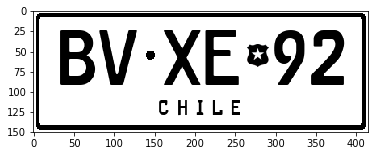

In [248]:
TotalImagenes = 1

sys.stdout.write("Generando " + str(TotalImagenes) + " imagenes\n\n")

for i in range(TotalImagenes+1):
    IsOld = random.randrange(2)
    Text = ["", "", ""]
    if IsOld:
        Text[0] = RandomString()
        Text[1] = str(random.randrange(2, 99, 1)).zfill(2)
        Text[2] = str(random.randrange(2, 99, 1)).zfill(2)
    else:
        Text[0] = RandomString()
        Text[1] = RandomString()
        Text[2] = str(random.randrange(2, 99, 1)).zfill(2)
    %matplotlib inline
    img = CreatePlate(Text)
    plot_img = np.asarray(img)
    plt.imshow(plot_img)
    t = 'Progreso: %s%s\r' % (str(i * 100 / TotalImagenes), "%")
    sys.stdout.write(t)
    img.save('./imagenes/' + GetName(Text) + ".png")